Yasaman Shahrasbi

COMP 5107 - Assignment3

Student#: 101201935

Problem Statement:


Consider the two-class pattern recognition problem in which the class conditional distributions are both 
normally distributed with arbitrary means M1 and M2, and covariance matrices sigma1 and sigma2 respectively. 


Assume that you are working in a 3-D space (for example, as in Assignment II) and that the covariance 
matrices are not equal. Here, you must assume that the means can be submitted as input parameters (and 
are not constant vectors) so that the classes can be made closer or more distant.

Libraries

In [ ]:
import numpy as np
from numpy import linalg as LA

# Inputs

In this part, the mean, covariance, and probability of each distribution are taken from the user.

## Mean

In [ ]:
# Class 1 Mean
mean1 = []
for i in range(3):
  mean1.append(float(input("mean of class1 values ")))
mean1 = np.array(mean1)

# Class 2 Mean
mean2 = []
for i in range(3):
  mean2.append(float(input("mean of class2 values ")))
mean2 = np.array(mean2)

print("mean1", mean1)
print("mean2", mean2)

mean of class1 values 4
mean of class1 values 1
mean of class1 values 3
mean of class2 values -4
mean of class2 values 1
mean of class2 values -3
mean1 [4. 1. 3.]
mean2 [-4.  1. -3.]


## Covariance

In [ ]:
# Covariance Parameters
a, b, c, alpha, beta = float(input("a ")), float(input("b ")), float(input("c ")), float(input("alpha ")), float(input("beta "))

a 4
b 3
c 2
alpha 0.1
beta 0.2


In [ ]:
# Covariance matrix 1
sigma1 = np.array([[a**2, alpha * a * b, beta * a * c],
                       [alpha * a * b, b**2, alpha * b * c],
                       [beta * a * c, alpha * b * c, c**2]])

In [ ]:
# Covariance matrix 2
sigma2 = np.array([[c**2, beta * b * c, alpha * a * c],
                       [beta * b * c, b**2, alpha * a * b],
                       [alpha * a * c, alpha * a * b, a**2]])

## Probabilities

In [ ]:
p1, p2 = float(input("p1 ")), float(input("p2 "))

p1 0.5
p2 0.5


# Part a

Generate 200 points of each distribution before diagonalization and plot them in the (x1–x2) and 
(x2–x3) domains. 

Function to generate Gaussian random matrices

[From assignment 2]

In [ ]:
# This function generates Gaussian random matrices. 
# It gets the dimension of points, number of points to generate, mean and covariance matrix as input.

def generate_gaussian_matrix(dimension, number_of_points, mean, sigma):
  # The first part of the code generates a gaussian random matrix of points with mean = 0 and covariance matrix = I (identity matrix) 
  random_matrix = np.zeros((dimension, number_of_points))
  for d in range(dimension):
    number = 0
    for i in range(0, 12):
      number = number + np.random.uniform(0, 1, number_of_points)
    number = number - 6
    random_matrix[d,:] = number

  # Now that a random gaussian matrix is generated with mean = 0 and covariance matrix = I (identity matrix), 
  # the goal is to convert the matrix to a normal distribution where mean is equal to mean of X and the convariance matrix is equal to sigma of X

  w, v = LA.eig(sigma) #eigen value and eigen vector of 
  matrix_X = np.dot(np.dot(v, np.power(np.diag(w), 1/2)), random_matrix)
  for col in range(number_of_points):
    matrix_X[:, col] = matrix_X[:, col] + mean
  return matrix_X

Generate 200 points of each distribution before diagonalization 

In [ ]:
# Generating 200 points of each distribution

matrix_X1 = generate_gaussian_matrix(3, 200, mean1, sigma1)
matrix_X2 = generate_gaussian_matrix(3, 200, mean2, sigma2)

In [ ]:
# Function to plot the points

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot

def plot(matrix_of_points1, matrix_of_points2, d1, d2, title):
  figure(figsize=(7, 7), dpi=80)
  plt.scatter(matrix_of_points1[d1-1, :], matrix_of_points1[d2-1, :], color = 'pink', label = "Class1")
  plt.scatter(matrix_of_points2[d1-1, :], matrix_of_points2[d2-1, :], color = 'green', label = "Class2")

  plt.title("x"+str(d1)+"-x"+str(d2)+" "+title) 
  plt.xlabel("x-"+str(d1))
  plt.ylabel("x-"+str(d2))
  plt.legend(fontsize=14)
  plt.show()

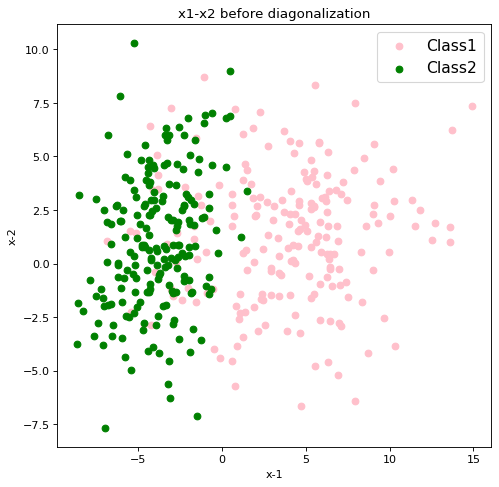

In [ ]:
# plot the points in matrix X1 and matrix X2 along x1-x2 dimension
plot(matrix_X1, matrix_X2, 1, 2, "before diagonalization")

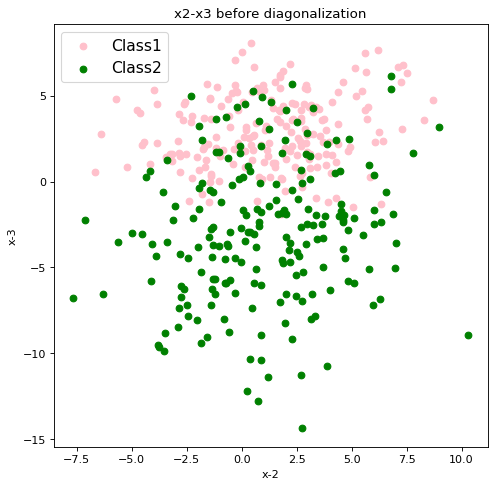

In [ ]:
# plot the points in matrix X1 and matrix X2 along x1-x3 dimension
plot(matrix_X1, matrix_X2, 2, 3, "before diagonalization")

# Part b

Assuming that you know the means and covariance matrices of the two classes, compute the 
optimal Bayes discriminant function, and plot it for in the (x1–x2) and (x2–x3) domains.

In [ ]:
# Function to compute the optimal Bayes discriminant

def bayes_discriminant(sigma1, mean1, sigma2, mean2, p1 = 50, p2 = 50):
  C = (1/2 * np.log(np.linalg.det(sigma2)/np.linalg.det(sigma1))) + np.log(p1/p2) + 1/2 * (np.dot(np.dot(np.transpose(mean2), np.linalg.inv(sigma2)), mean2) -  np.dot(np.dot(np.transpose(mean1), np.linalg.inv(sigma1)), mean1))
  B = np.transpose(np.dot(np.transpose(mean1), np.linalg.inv(sigma1)) - np.dot(np.transpose(mean2), np.linalg.inv(sigma2)))
  A = 1/2 * (np.linalg.inv(sigma2) - np.linalg.inv(sigma1)) 
  return A, B, C

In [ ]:
A, B, C = bayes_discriminant(sigma1, mean1, sigma2, mean2, p1, p2)

In [ ]:
A

array([[ 0.09831833, -0.01324153,  0.00728284],
       [-0.01324153,  0.00176554,  0.00353107],
       [ 0.00728284,  0.00353107, -0.09931144]])

In [ ]:
B

array([ 1.23013771, -0.22951977,  0.82715395])

In [ ]:
C

1.0818326271186445

## Plot the discriminant functions along X1-X2 and X2 - X3

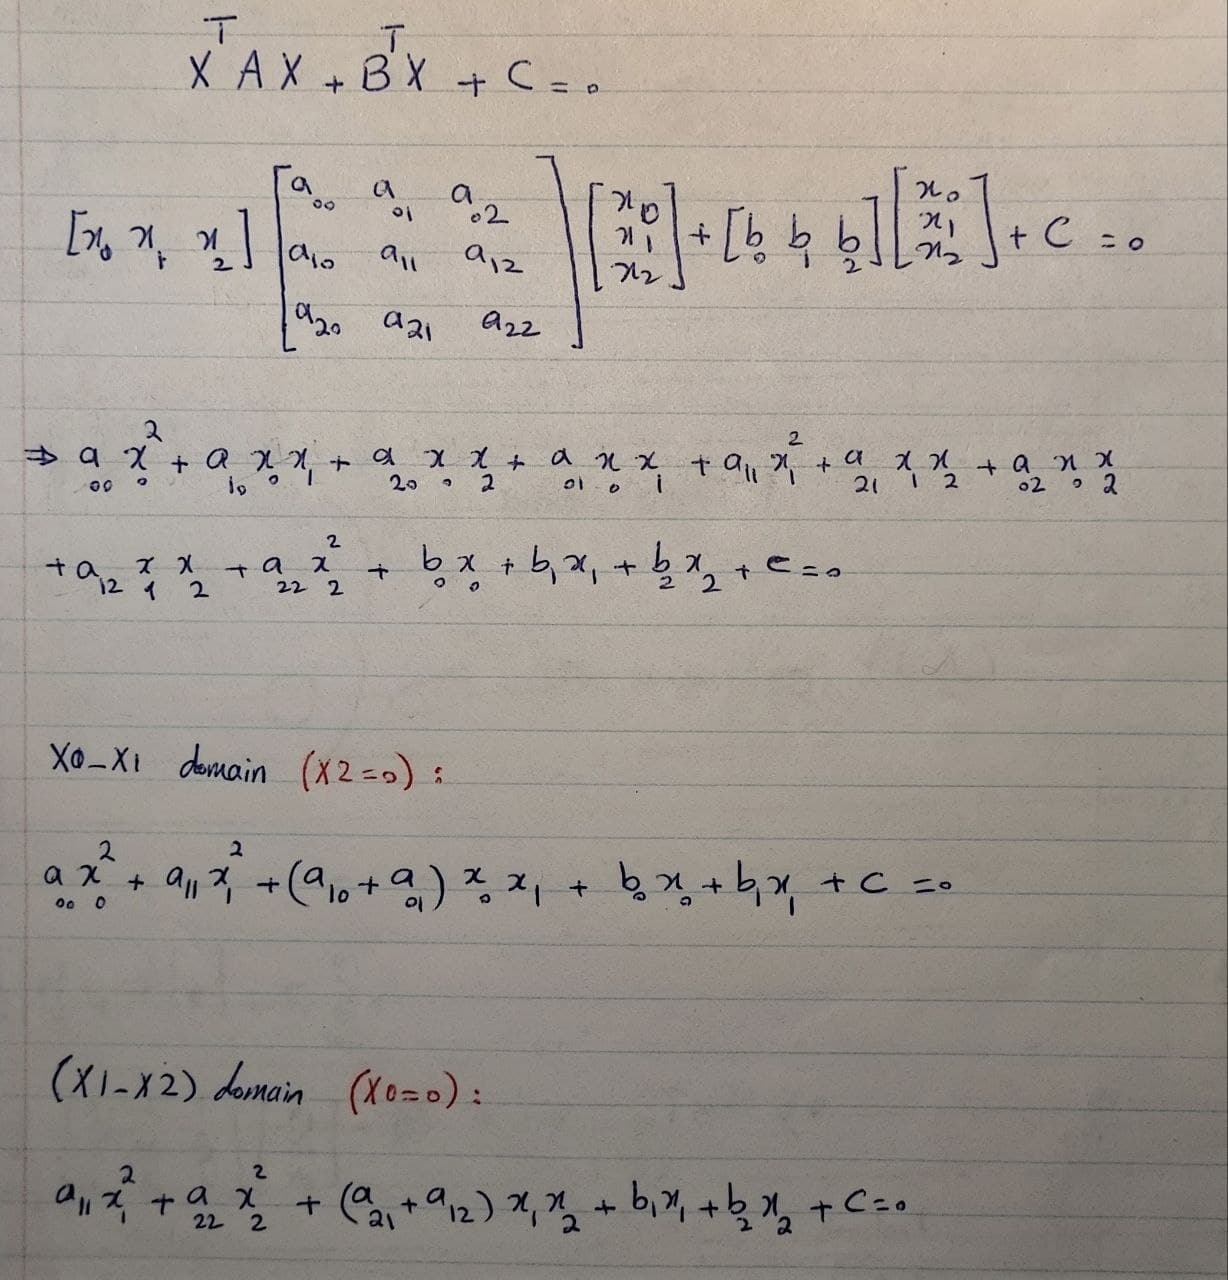

In [ ]:
# X1-X2 domain (X0 - X1 in my code since I'm start indexing from 0):
# consider X0 as a variable and X1 as a constant
# This function finds the discriminant curve between class one and class two
# , by finding the points located on that curve.

def discriminant_function_X0_X1(sigma1, mean1, sigma2, mean2, p1, p2):
  A, B, C = bayes_discriminant(sigma1, mean1, sigma2, mean2, p1, p2)
  x1_points = []
  roots1_x0 = []
  roots2_x0 = []
  for x1 in np.arange(-5, 5, 0.1): # -5, 5, 0.1
    x1_points.append(x1)
    m = A[0][0]
    n = np.dot((A[1][0] + A[0][1]), x1) + B[0]
    p = np.dot(A[1][1], np.power(x1, 2)) + np.dot(B[1], x1) + C
    root1_x0, root2_x0 = np.roots(np.array([m, n, p]))
    roots1_x0.append(root1_x0)
    roots2_x0.append(root2_x0)
  return x1_points, roots1_x0, roots2_x0

In [ ]:
# X2 - X3 domain (X1-X2 in my code since I'm start indexing form 0):
# consider X1 as a variable and x2 as a constant

def discriminant_function_X1_X2(sigma1, mean1, sigma2, mean2, p1, p2):
  A, B, C = bayes_discriminant(sigma1, mean1, sigma2, mean2, p1, p2)
  x2_points = []
  roots1_x1 = []
  roots2_x1 = []
  for x2 in np.arange(-5, 5, 0.1):
    x2_points.append(x2)
    m = A[1][1]
    n = np.dot((A[2][1] + A[1][2]), x2) + B[1]
    p = np.dot(A[2][2], np.power(x2, 2)) + np.dot(B[2], x2) + C
    root1_x1, root2_x1 = np.roots(np.array([m, n, p]))
    roots1_x1.append(root1_x1)
    roots2_x1.append(root2_x1)
  return x2_points, roots1_x1, roots2_x1

The difference between plot and plot2 functions are that in plot2, in addition to the points from each class, the discriminant function is shown as well.

In [ ]:
def plot2(matrix_of_points1, matrix_of_points2, points, roots1, roots2, d1, d2, title):
  figure(figsize=(7, 7), dpi=80)
  plt.scatter(matrix_of_points1[d1-1, :], matrix_of_points1[d2-1, :], color = 'pink', label = "Class1")
  plt.scatter(matrix_of_points2[d1-1, :], matrix_of_points2[d2-1, :], color = 'green', label = "Class2")

  plt.scatter(roots1, points, color = 'blue', label = "discriminant function")
  plt.scatter(roots2, points, color = 'purple', label = "discriminant function")

  plt.title("x"+str(d1)+"-x"+str(d2)+" "+title) 
  plt.xlabel("x-"+str(d1))
  plt.ylabel("x-"+str(d2))
  plt.legend(fontsize=14)
  plt.show()

### Plot on X1-X2 domain

In [ ]:
x1_points_01_w1, roots1_x0_01_w1, roots2_x0_01_w1 = discriminant_function_X0_X1(sigma1, mean1, sigma2, mean2, p1, p2)

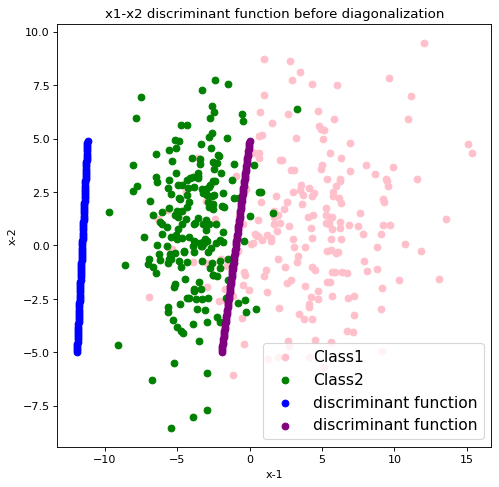

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x1_points_01_w1,
      roots1 = roots1_x0_01_w1,
      roots2 = roots2_x0_01_w1,
      d1 = 1, 
      d2 = 2, 
      title = "discriminant function before diagonalization")

### Plot on X2-X3 domain

In [ ]:
x2_points_12_w1, roots1_x1_01_w1, roots2_x1_01_w1 = discriminant_function_X1_X2(sigma1, mean1, sigma2, mean2, p1, p2)

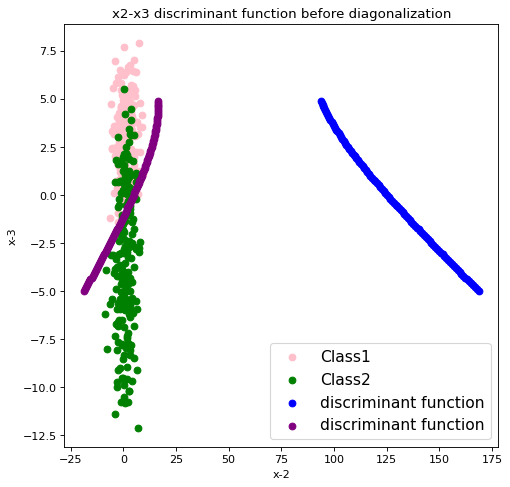

In [ ]:
plot2(matrix_of_points1 = matrix_X1, 
      matrix_of_points2 = matrix_X2, 
      points = x2_points_12_w1,
      roots1 = roots1_x1_01_w1,
      roots2 = roots2_x1_01_w1,
      d1 = 2, 
      d2 = 3, 
      title = "discriminant function before diagonalization")

# Part c

Generate 200 new points for each class for testing purposes, classify them and report the 
classification accuracy.

## Generating points for testing

In [1]:
test_matrix_X1 = generate_gaussian_matrix(3, 200, mean1, sigma1)
test_matrix_X2 = generate_gaussian_matrix(3, 200, mean2, sigma2)

NameError: ignored

In [ ]:
test_matrix_X1.shape

In [ ]:
# This function calculates tp, tn, fp, and fn for computing the accuracy

# If X_T * A * X + B_T * X + C > 0:
# X belongs to class w1
# Otherwise, X belongs to class w2

def confusion_matrix (class1_points, class2_points, sigma1, mean1, sigma2, mean2, p1, p2):
  tp, tn, fp, fn = 0, 0, 0, 0
  A, B, C = bayes_discriminant(sigma1, mean1, sigma2, mean2, p1, p2)
  # for class1:
  for i in range (200):
    pnt = []
    for j in range (3):
      pnt.append(class1_points[j][i])
    t = np.dot(np.dot(np.transpose(pnt), A), pnt) + np.dot(np.transpose(B), pnt) + C
    if t > 0:
      tp += 1
    if t < 0:
      fn += 1

  # for class2:
  for i in range (200):
    pnt = []
    for j in range (3):
      pnt.append(class2_points[j][i])
    v = np.dot(np.dot(np.transpose(pnt), A), pnt) + np.dot(np.transpose(B), pnt) + C
    if v < 0:
      tn += 1
    if v > 0:
      fp += 1

  return tp, fn, tn, fp

In [ ]:
tp, fn, tn, fp = confusion_matrix(test_matrix_X1, test_matrix_X2, sigma1, mean1, sigma2, mean2, p1, p2)

In [ ]:
print(tp, tn, fp, fn)

187 195 5 13


## Overall Accuracy:

In [ ]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
accuracy

0.955

## Class1 Accuracy:

In [ ]:
tp / (tp + fn)

0.935

## Class2 Accuracy

In [ ]:
tn / (tn + fp)

0.975

# Part d

Use the original training points after diagonalization and plot them for the in the (x1–x2) and (x2–
x3) domains.

In [ ]:
# Diagonalizing function

def diagonalize (matrix_X1, matrix_X2, sigma1, mean1, sigma2, mean2):

  # Calculate eigen values and eigen vectors of sigma1 and sigma2
  eigen_value_sigma_1, eigen_vector_sigma1 = LA.eig(sigma1)
  eigen_value_sigma_2, eigen_vector_sigma2 = LA.eig(sigma2)

  # Step1: Diagonalizing the distribution of points in class 1 -> isothetic elipses
  # Y = H * X
  matrix_Y1 = np.dot(np.transpose(eigen_vector_sigma1), matrix_X1)
  matrix_Y2 = np.dot(np.transpose(eigen_vector_sigma1), matrix_X2)
  # sigma Y = H * sigma X * transpose(H)
  sigma_Y1 = np.dot(np.dot(np.transpose(eigen_vector_sigma1), sigma1), eigen_vector_sigma1)
  sigma_Y2 = np.dot(np.dot(np.transpose(eigen_vector_sigma1), sigma2), eigen_vector_sigma1)

  # Step2: Diagonalizing and whitening the distribution of points in class 1 -> concentric circles
  # Z = H * Y
  # Z = power(lambda, -1/2) * Y
  matrix_Z1 = np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), matrix_Y1)
  matrix_Z2 = np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), matrix_Y2)
  # sigma Z = H * sigma X * transpose(H)
  # sigma Z = power(lambda, -1/2) * sigma Y * power(lambda, -1/2)
  sigma_Z1 = np.dot(np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), sigma_Y1), np.diag(np.power(eigen_value_sigma_1, -1/2)))
  sigma_Z2 = np.dot(np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), sigma_Y2), np.diag(np.power(eigen_value_sigma_1, -1/2)))

  # Step3: Diagonalizing the distribution of points in class 2 -> isothetic elipses
  eigen_value_sigma_Z1, eigen_vector_sigma_Z1 = LA.eig(sigma_Z1)
  eigen_value_sigma_Z2, eigen_vector_sigma_Z2 = LA.eig(sigma_Z2)
  # A = H * Z
  matrix_A1 = np.dot(np.transpose(eigen_vector_sigma_Z2), matrix_Z1)
  matrix_A2 = np.dot(np.transpose(eigen_vector_sigma_Z2), matrix_Z2)
  # sigma A = H * sigma X * transpose(H)
  sigma_A1 = np.dot( np.dot(np.transpose(eigen_vector_sigma_Z2), sigma_Z1), eigen_vector_sigma_Z2 )
  sigma_A2 = np.dot( np.dot(np.transpose(eigen_vector_sigma_Z2), sigma_Z2), eigen_vector_sigma_Z2 )


  overall_multiplying_matrix = np.dot(np.dot(np.transpose(eigen_vector_sigma_Z2), np.diag(np.power(eigen_value_sigma_1, -1/2))), np.transpose(eigen_vector_sigma1))
  new_matrix_X1 = np.dot(overall_multiplying_matrix, matrix_X1)
  new_matirx_X2 = np.dot(overall_multiplying_matrix, matrix_X2)
  sigma_new_matrix_X1 = sigma_A1
  sigma_new_matrix_X2 = sigma_A2
  mean_new_matrix_X1 = np.dot(overall_multiplying_matrix, mean1)
  mean_new_matrix_X2 = np.dot(overall_multiplying_matrix, mean2)

  return new_matrix_X1, new_matirx_X2, sigma_new_matrix_X1, sigma_new_matrix_X2, mean_new_matrix_X1, mean_new_matrix_X2

## Diagonalize training points

In [ ]:
new_matrix_X1, new_matrix_X2, sigma_new_matrix_X1, sigma_new_matrix_X2, mean_new_matrix_X1, mean_new_matrix_X2 = diagonalize(matrix_X1, matrix_X2, sigma1, mean1, sigma2, mean2)

## Diagonalize testing points

In [ ]:
new_test_matrix_X1, new_test_matrix_X2, sigma_new_test_matrix_X1, sigma_new_test_matrix_X2, mean_new_test_matrix_X1, mean_new_test_matrix_X2 = diagonalize(test_matrix_X1, test_matrix_X2, sigma1, mean1, sigma2, mean2)

## Ploting training points after diagonalization

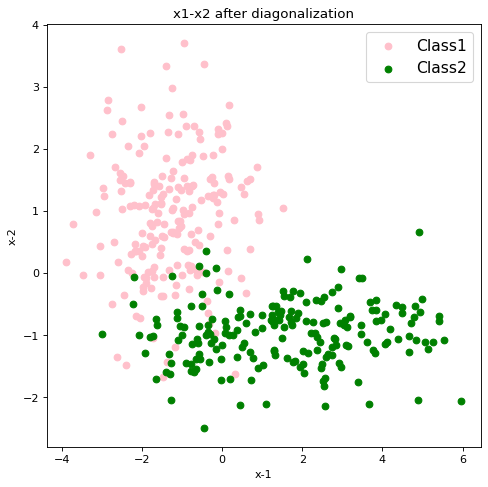

In [ ]:
# plot the points in the transformed matrix X1 and the transformed matrix X2 along x1-x2 dimension
plot(new_matrix_X1, new_matrix_X2, 1, 2, "after diagonalization")

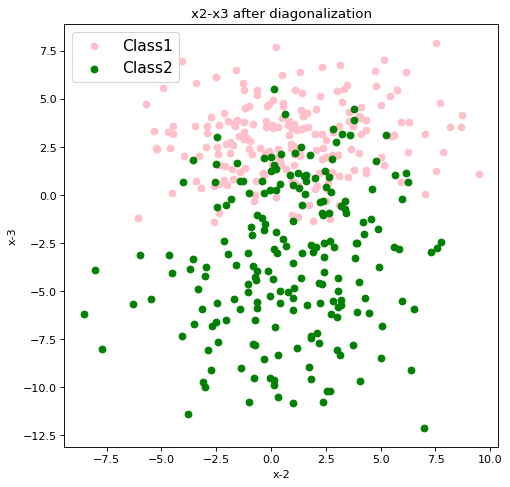

In [ ]:
# plot the points in the transformed matrix X1 and the transformed matrix X2 along x1-x3 dimension
plot(matrix_X1, matrix_X2, 2, 3, "after diagonalization")

# Part e

Assuming that you know the means and covariance matrices of the two “transformed” 
(diagonalized) classes, compute the optimal Bayes discriminant function in the transformed 
domain, and plot it in the (x1–x2) and (x2–x3) domains.

### Plot on X1-X2 domain

In [ ]:
transformed_x1_points_01_w1, transformed_roots1_x0_01_w1, transformed_roots2_x0_01_w1 = discriminant_function_X0_X1(sigma_new_matrix_X1, mean_new_matrix_X1, sigma_new_matrix_X2, mean_new_matrix_X2, p1, p2)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


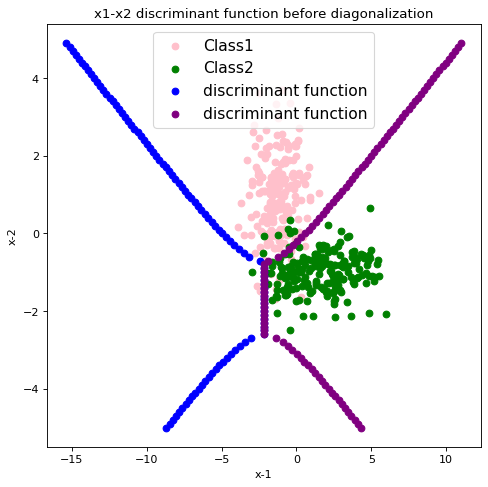

In [ ]:
plot2(matrix_of_points1 = new_matrix_X1, 
      matrix_of_points2 = new_matrix_X2, 
      points = transformed_x1_points_01_w1,
      roots1 = transformed_roots1_x0_01_w1,
      roots2 = transformed_roots2_x0_01_w1,
      d1 = 1, 
      d2 = 2, 
      title = "discriminant function before diagonalization")

### Plot on X2-X3 domain

In [ ]:
transformed_x1_points_12_w1, transformed_roots1_x2_01_w1, transformed_roots2_x2_01_w1 = discriminant_function_X1_X2(sigma_new_matrix_X1, mean_new_matrix_X1, sigma_new_matrix_X2, mean_new_matrix_X2, p1, p2)

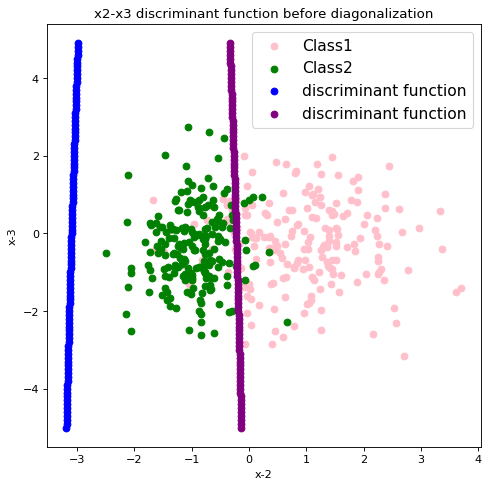

In [ ]:
plot2(matrix_of_points1 = new_matrix_X1, 
      matrix_of_points2 = new_matrix_X2, 
      points = transformed_x1_points_12_w1,
      roots1 = transformed_roots1_x2_01_w1,
      roots2 = transformed_roots2_x2_01_w1,
      d1 = 2, 
      d2 = 3, 
      title = "discriminant function before diagonalization")

# Part f

Using the same testing points of (c), classify them in the transformed domain, and report the 
classification accuracy

## c.1. overall accuracy:

Here, class1 is considered as the positive class, and class2 as the negative class

In [ ]:
transformed_tp, transformed_fn, transformed_tn, transformed_fp = confusion_matrix(new_test_matrix_X1, new_test_matrix_X2, sigma_new_test_matrix_X1, mean_new_test_matrix_X1, sigma_new_test_matrix_X2, mean_new_test_matrix_X2, p1, p2)

In [ ]:
print(transformed_tp, transformed_fn, transformed_tn, transformed_fp)

187 13 195 5


## Overall Accuracy:

In [ ]:
accuracy = (transformed_tp + transformed_tn) / (transformed_tp + transformed_fp + transformed_tn + transformed_fn)
accuracy

0.955

## Class1 Accuracy:

In [ ]:
transformed_tp / (transformed_tp + transformed_fn)

0.935

## Class2 Accuracy

In [ ]:
transformed_tn / (transformed_tn + transformed_fp)

0.975